In [5]:
#from __future__ import print_function
import sys
sys.path.append('/Users/rohaanadvani/Library/Python/2.7/site-packages'),
import vamp
import librosa
from librosa import display
import pychorus
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy as sp

%matplotlib inline
from IPython.display import Audio


In [6]:
# def Aud2Str(melody, threshold=1):
#     string_out = []
#     prev = melody[0]
#     for i in range(1,len(melody)):
#         curr = melody[i]
#         diff = curr - prev
#         # if curr < 0 means non-melody section, so we skip
#         if curr >= 0:
#             s = 's'
#             if abs(diff) > threshold:
#                 s = 'u' if diff>0 else 'd'
#                 prev = curr
#             string_out.append(s)
#     return string_out

In [7]:
# melody is what vamp.collect() returns in data[vector], i.e. melody data
# default vamp hop size is 128/44100
# need to parse data according to desired_hop (in seconds)
# returns melody_desired
# def parseMelody(melody, desired_hop):
#     default_hop = 128/44100
#     jump = int(desired_hop/default_hop)
#     index = 0
#     melody_desired = []
#     while index < len(melody):
#         melody_desired.append(melody[index])
#         index = index + jump
#     melody_desired = np.array(melody_desired)
#     return melody_desired

In [8]:
# # example of how to parse melody data
# audio, sr = librosa.load('InMyFeelings.wav', sr=44100, mono=True)
# # audio = audio[0:15*44100]  #if you want to analyze only section of song
# Audio(audio, rate=sr)

# data = vamp.collect(audio, sr, "mtg-melodia:melodia")
# # data is a dictionary containing one item called "vector"
# # vector is a tuple of two values: the hop size used for analysis and the array of pitch values
# # Note that the hop size is *always* equal to 128/44100.0 = 2.9 ms
# h, m = data['vector']

# hop = 0.25  #desired hop in seconds
# melody = parseMelody(m, hop)

In [9]:
# timestamps = 8 * 128/44100.0 + np.arange(len(melody)) * hop
# # Melodia returns unvoiced (=no melody) sections as negative values. So by default, we get:
# plt.figure(figsize=(18,6))
# plt.plot(timestamps, melody)
# plt.xlabel('Time (s)')
# plt.ylabel('Frequency (Hz)')
# # plt.xlim(0, 15)
# plt.show()

In [10]:
# threshold = 1  # play with this to see how it affects performance- essentially if this is high, only larger melody changes will be noted
# out = Aud2Str(melody, threshold)
# print(out)

In [13]:
def similarity_score(chroma_song, chroma_hum):
    chroma_song = chroma_song.T
    chroma_hum = chroma_hum.T

    start_chunk = 0
    end_chunk = len(chroma_hum)
    best_score = 0

    while end_chunk <= len(chroma_song):
        song_chunk = chroma_song[start_chunk:end_chunk]   
        total_diff = 0
        for i in range(len(chroma_hum)):
            v1 = chroma_hum[i]
            v2 = chroma_song[start_chunk+i]
#             diff = np.linalg.norm(v1-v2)
#             diff_norm = diff/math.sqrt(12)  #to get a value between 0 and 1
            diff = sp.spatial.distance.cosine(v1, v2)
            total_diff = total_diff + diff
        total_diff = total_diff / len(chroma_hum)  # to get value between 0 and 1
        score = 1 - total_diff
        if score > best_score:
            best_score = score
        start_chunk = start_chunk + 1
        end_chunk = end_chunk + 1
    
    return best_score

In [18]:
audio, sr = librosa.load('SweetCarolineHum.wav', sr=44100, mono=True)
Audio(audio, rate=sr)

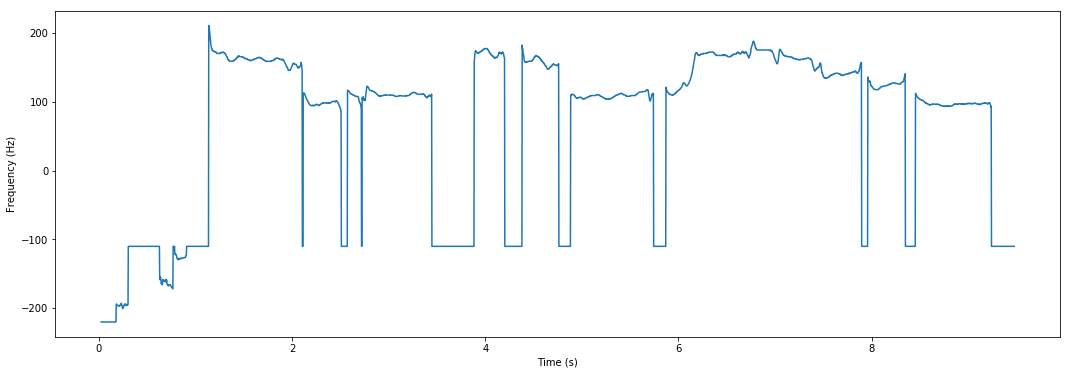

In [20]:
data = vamp.collect(audio, sr, "mtg-melodia:melodia")
h, melody = data['vector']
timestamps = 8 * 128/44100.0 + np.arange(len(melody)) *128/44100
# Melodia returns unvoiced (=no melody) sections as negative values. So by default, we get:
plt.figure(figsize=(18,6))
plt.plot(timestamps, melody)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
# plt.xlim(0, 15)
plt.show()

In [43]:
# clip_len = len(audio)/44100
# print(clip_len)
pychorus.find_and_output_chorus('SweetCaroline.wav', 'SweetCarolineChorus.wav')
# print(chorus_start)
# sweet_caroline_full, sr = librosa.load('SweetCaroline.wav', sr=44100, mono=True)
# print(len(sweet_caroline_full)/44100)
# sweet_caroline_chorus = sweet_caroline_full[round(chorus_start*44100):round((chorus_start+clip_len)*44100)]
# Audio(sweet_caroline_chorus, rate=sr)
# sweet_caroline_chorus, sr = librosa.load('SweetCarolineChorus.wav', sr=44100, mono=True)
# Audio(sweet_caroline_chorus, rate=sr)

pychorus.find_and_output_chorus('StacysMom.wav', 'StacysMomChorus.wav')


Best chorus found at 2 min 51.86 sec
Best chorus found at 1 min 35.10 sec


95.10388074179015

In [19]:
song,sr = librosa.load('TongueTied.wav')
chroma_song = librosa.feature.chroma_stft(y=song, sr=sr)
# chroma_song[chroma_song<0.5] = 0
hum,sr = librosa.load('SweetCarolineHum.wav')
chroma_hum = librosa.feature.chroma_stft(y=hum, sr=sr)
# chroma_hum[chroma_hum<0.5] = 0

# plt.subplot(4, 2, 5)
# librosa.display.specshow(chroma_song, y_axis='chroma')
# plt.colorbar()
# plt.title('Chromagram')

print(similarity_score(chroma_song, chroma_hum))

0.6632635506902675


Text(0.5, 1.0, 'Chromagram')

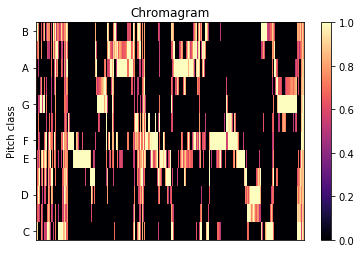

In [16]:
librosa.display.specshow(chroma_hum, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')

Text(0.5, 1.0, 'Chromagram')

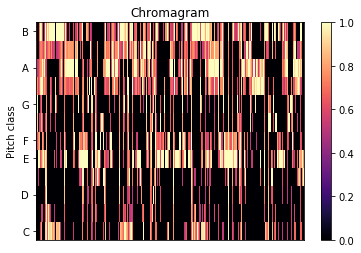

In [17]:
song2,sr = librosa.load('StacysMomChorus.wav')
chroma_song2 = librosa.feature.chroma_stft(y=song2, sr=sr)
chroma_song2[chroma_song2<0.5] = 0
librosa.display.specshow(chroma_song2, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')